# QUESTION 1

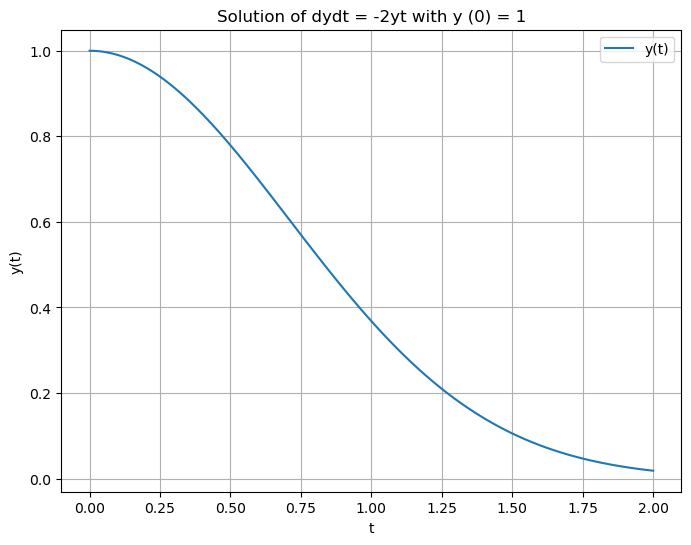

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODE dy/dt = -2yt
def model (y,t) :
    dydt = -2 * y *t
    return dydt

# initial condition y(0) = 1
y0 = 1

# Time points to solve the ODE
t = np.linspace (0,2,100)

#Solve the ODE using odeint
solution = odeint (model, y0, t)

#PLot the solution
plt.figure(figsize=(8,6))
plt.plot(t, solution, label = 'y(t)')
plt.title ('Solution of dydt = -2yt with y (0) = 1')
plt.xlabel ('t')
plt.ylabel ('y(t)')
plt.legend ()
plt.grid (True)
plt.show ()


# QUESTION 2

In [10]:
#Importing necessary libraries
import numpy as np
import scipy as sp

# Define the coefficent matrix A
A = np.array ([[2,4,6],[5,3,2],[7,8,9]])

# Define the constant vector B
B = np.array ([18,13,30])

# Use numpy.linalg.solve to find the solution vector X
X = np.linalg.solve(A,B)

# Display the solution vector
print ("Solution vector (x,y,x):", X)

Solution vector (x,y,x): [ 4.5 -7.5  6.5]


# QUESTION 3

In [ ]:
import requests
import matplotlib.pyplot as plt

def fetch_temperature_data(latitude, longitude, forecast_days):
    # API endpoint URL
    endpoint = "https://api.open-meteo.com/v1/forecast"
    
    # Parameters for the API request
    params = {
        'latitude': latitude,
        'longitude': longitude,
        'hourly': 'temperature_2m',
        'timezone': 'Asia/Singapore',
        'forecast_days': forecast_days
    }
    
    # Send GET request to the API
    response = requests.get(endpoint, params=params)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Extract hourly time points and temperature data from the API response
        data = response.json()
        hourly_data = data['hourly']['temperature_2m']
        return hourly_data
    else:
        print(f"Error: Unable to fetch data. Status code {response.status_code}")
        return None

def plot_temperature_trend(latitude, longitude, forecast_days, hourly_data):
    # Extract time points and temperature values
    time_points = [entry['timestamp'] for entry in hourly_data]
    temperatures = [entry['value'] for entry in hourly_data]

    # Plot the temperature trend
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, temperatures, marker='o', linestyle='-', color='b')

    # Set labels and title
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Trend for Latitude {latitude}, Longitude {longitude}\nForecast for {forecast_days} Days')

    # Add a grid for better readability
    plt.grid(True)
 
    # Show the plot
    plt.show()

def main():
    # User input for latitude, longitude, and forecast days
    latitude = input("Enter latitude: ")
    longitude = input("Enter longitude: ")
    forecast_days = int(input("Enter the number of forecast days (1-16): "))
 
    # Validate forecast_days within the specified range
    if 1 <= forecast_days <= 16:
        # Fetch temperature data from the API
        hourly_data = fetch_temperature_data(latitude, longitude, forecast_days)
    
        if hourly_data:
            # Plot the temperature trend
            plot_temperature_trend(latitude, longitude, forecast_days, hourly_data)
        else:
            print("Exiting program.")
    else:
        print("Error: Forecast days should be between 1 and 16.")

if __name__ == "__main__":
    main()


Enter latitude: 2.375
Enter longitude: 112.5
